In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import log
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering  
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN 
from sklearn.cluster import MiniBatchKMeans 
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score 

In [2]:
cf = pd.read_csv('cf.csv')

In [3]:
cf.columns

Index(['Unnamed: 0', 'nombre', 'apellido', 'edad', 'altura', 'peso',
       'back_squat', 'clean_jerk', 'snatch', 'deadlift', 'fran', 'puntos',
       'wod_1', 'wod_2', 'wod_5'],
      dtype='object')

In [3]:
cf.drop('Unnamed: 0', axis = 1, inplace = True)
cf.drop('altura', axis = 1, inplace = True)

In [4]:
cf.describe()

,edad,peso,back_squat,clean_jerk,snatch,deadlift,fran,puntos,wod_1,wod_2,wod_5
count,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000
mean,29.910468,86.082670,190.438194,141.855240,113.703285,224.184779,149.773760,9745.005510,672.724518,814.557851,804.596419
std,4.759192,7.543101,23.488521,16.031656,14.652165,26.660303,26.938686,8709.188764,79.704150,81.874648,100.951219
min,17.000000,31.298195,45.359702,45.359702,36.287762,45.359702,80.000000,64.000000,496.000000,616.000000,609.000000
25%,27.000000,81.647464,176.902840,131.543137,105.000000,207.250000,133.000000,2737.000000,609.250000,752.000000,727.250000
50%,30.000000,86.183435,190.510750,142.883063,115.000000,226.798512,143.500000,5344.500000,669.500000,816.000000,783.000000
75%,33.000000,90.719405,205.000000,151.955003,124.739182,240.000000,159.500000,20729.750000,738.750000,882.750000,875.750000
max,46.000000,114.000000,260.818289,179.624422,154.222988,299.374036,383.000000,23011.000000,859.000000,1028.000000,1194.000000


In [5]:
cf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   nombre      726 non-null    object 
 1   apellido    726 non-null    object 
 2   edad        726 non-null    float64
 3   peso        726 non-null    float64
 4   back_squat  726 non-null    float64
 5   clean_jerk  726 non-null    float64
 6   snatch      726 non-null    float64
 7   deadlift    726 non-null    float64
 8   fran        726 non-null    float64
 9   puntos      726 non-null    float64
 10  wod_1       726 non-null    float64
 11  wod_2       726 non-null    float64
 12  wod_5       726 non-null    float64
dtypes: float64(11), object(2)
memory usage: 73.9+ KB


# Aplicar logaritmos
Aplicaré logaritmos al dataset para, los outliers que tengo y no quiero eliminar, no me contaminen los resultados

---

In [5]:
columnas = [i for i in cf.columns[2:]]

In [6]:
cf_log = pd.DataFrame()
cf_log[columnas] = cf[columnas].applymap(lambda x:log(x))

# PCA
Para este análisis se van a excluir las variables de los wods y los puntos

---

In [7]:
cf_log.columns

Index(['edad', 'peso', 'back_squat', 'clean_jerk', 'snatch', 'deadlift',
       'fran', 'puntos', 'wod_1', 'wod_2', 'wod_5'],
      dtype='object')

In [8]:
cf1 = cf_log.loc[:,['edad', 'peso', 'back_squat', 'clean_jerk', 'snatch', 'deadlift','fran']]
cf1.head()

,edad,peso,back_squat,clean_jerk,snatch,deadlift,fran
0,3.401197,4.482453,5.329751,5.081572,4.861943,5.598015,4.897840
1,3.433987,4.482453,5.393603,5.136380,4.962027,5.424062,4.844187
2,3.332205,4.429810,5.307528,5.023584,4.865446,5.463283,4.962845
3,3.258097,4.492658,5.372769,5.141699,4.879335,5.549813,4.804021
4,3.367296,4.456478,5.307528,5.081572,4.872414,5.434012,4.770685


<AxesSubplot:>

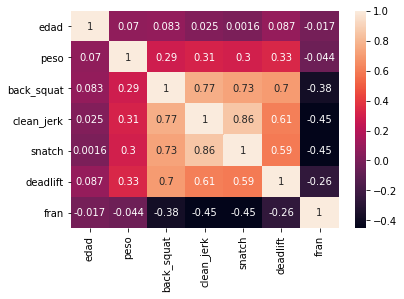

In [9]:
sns.heatmap(cf1.corr(), annot = True)

In [10]:
#Escalamos

from sklearn.preprocessing import MinMaxScaler

cf_array = MinMaxScaler().fit_transform(cf1)
cf_array = pd.DataFrame(cf_array, columns = cf1.columns)

In [12]:
# Con esto ya tenemos los datos con logaritmos y escalados

cf_array.head()

,edad,peso,back_squat,clean_jerk,snatch,deadlift,fran
0,0.570593,0.803700,0.866183,0.920584,0.878047,0.945059,0.329381
1,0.603533,0.803700,0.902686,0.960408,0.947217,0.852877,0.295120
2,0.501283,0.762974,0.853478,0.878449,0.880468,0.873661,0.370891
3,0.426835,0.811594,0.890776,0.964273,0.890067,0.919515,0.269471
4,0.536535,0.783605,0.853478,0.920584,0.885284,0.858150,0.248184


In [13]:
from sklearn.decomposition import PCA

pca = PCA()
cf_pca = pca.fit_transform(cf_array)
len(pca.explained_variance_ratio_)

7

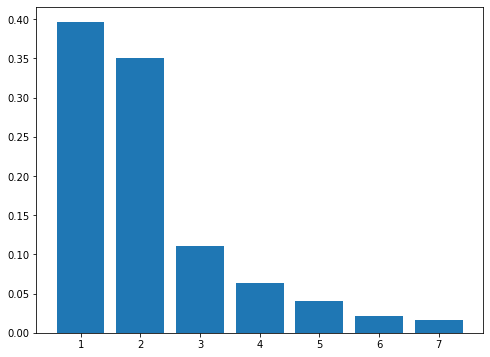

In [14]:
plt.figure(figsize = (8,6))
plt.bar(range(1, 8), pca.explained_variance_ratio_)
plt.show()

### 3 componentes

---

In [15]:
# Elijo 2 componentes

pca = PCA(n_components = 3)
cf_pca = pca.fit_transform(cf_array)
len(pca.explained_variance_ratio_)

3

In [16]:
pd.DataFrame(
    data = pca.components_,
    columns = cf_array.columns,
    index = ['PC1', 'PC2', 'PC3']
)



,edad,peso,back_squat,clean_jerk,snatch,deadlift,fran
PC1,-0.405318,-0.166901,-0.384008,-0.461058,-0.494851,-0.298923,0.337034
PC2,0.912174,-0.038182,-0.142741,-0.216091,-0.249865,-0.100072,0.164208
PC3,0.031299,-0.396250,-0.160548,-0.112238,-0.108791,-0.230708,-0.859402


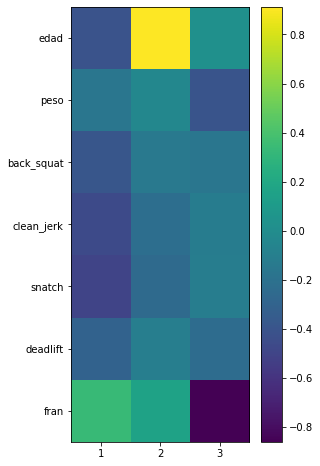

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 8))

componentes = pca.components_

plt.imshow(componentes.T, cmap = 'viridis', aspect = 'auto')
plt.yticks(range(len(cf_array.columns)), cf_array.columns)
plt.xticks(range(len(cf.iloc[:,:3].columns)), np.arange(3) + 1)

plt.colorbar();

In [18]:
# Guardamos lass componentes en un dataframe para hacer el k-means

df_pca3 = pd.DataFrame(cf_pca, columns = ['PC1', 'PC2', 'PC3'])
df_pca3.head()

,PC1,PC2,PC3
0,-0.173804,-0.059334,-0.008684
1,-0.237755,-0.056787,0.025202
2,-0.080474,-0.096727,-0.007412
3,-0.164945,-0.214004,0.030908
4,-0.156735,-0.094264,0.089296


# K-means

---

### Gráfica del codo

In [21]:
# Inercia

inercia = list()

for k in range(1,15):
    kmedias = MiniBatchKMeans(k)
    kmedias.fit(df_pca3)
    inercia.append(kmedias.inertia_)

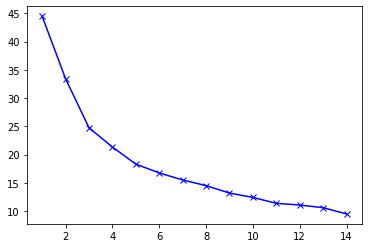

In [22]:
# En el gráfico se ve un codo en 3 y otro en 5. Por falta de tiempo solo probaremos con 3

plt.plot(range(1,15), inercia, 'bx-')

#### K = 4

In [36]:
kmedias = KMeans(n_clusters = 4)
kmedias.fit(df_pca3)

KMeans(n_clusters=4)

In [37]:
print('Silhouette -->', silhouette_score(df_pca3, kmedias.labels_))
print('*****'*10)
print('Davies Bouldin -->',davies_bouldin_score(df_pca3, kmedias.labels_))

Silhouette --> 0.26192014356007
**************************************************
Davies Bouldin --> 1.149890273190234


In [38]:
# Guardo las labels para añadirlas al data frame

labels_3_4 = kmedias.labels_

In [40]:
# Compruebo que tiene cf

cf.head()

,nombre,apellido,edad,peso,back_squat,clean_jerk,snatch,deadlift,fran,puntos,wod_1,wod_2,wod_5
0,Patrick,Vellner,30.0,88.451420,206.386646,161.026944,129.275152,269.890230,134.0,64.0,518.0,988.0,609.0
1,Mathew,Fraser,31.0,88.451420,219.994557,170.098884,142.883063,226.798512,127.0,74.0,508.0,959.0,645.0
2,Björgvin Karl,Guðmundsson,28.0,83.915450,201.850676,151.955003,129.728749,235.870453,143.0,97.0,496.0,991.0,611.0
3,Jeffrey,Adler,26.0,89.358614,215.458587,171.006078,131.543137,257.189513,122.0,100.0,546.0,1016.0,659.0
4,Noah,Ohlsen,29.0,86.183435,201.850676,161.026944,130.635943,229.066497,118.0,127.0,533.0,973.0,662.0


In [43]:
# Añado la columna labels al data frame original

df = cf.copy()
df['cluster'] = labels_3_4

# Eda K-means con K = 4

<AxesSubplot:xlabel='cluster', ylabel='count'>

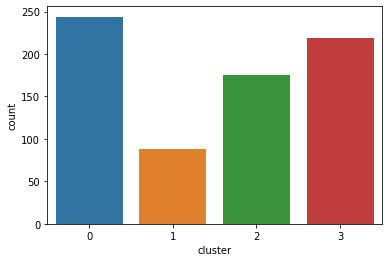

In [44]:
## Número de participantes por clases ##

sns.countplot(x = df.loc[:,'cluster'])

# Vemos algo de desbalanceo en las clases.

In [50]:
# Guardo las columnas en una lista para usarlo en bucles y tenerlas más accesibles

columnas = [columna for columna in df.iloc[:,2:].columns]

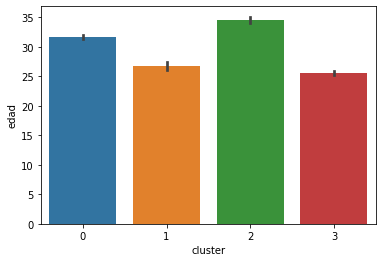

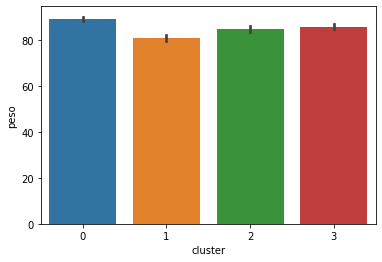

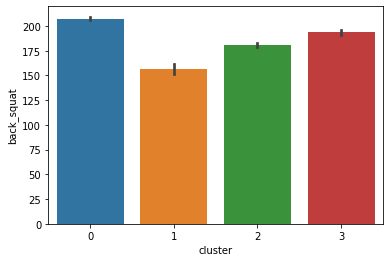

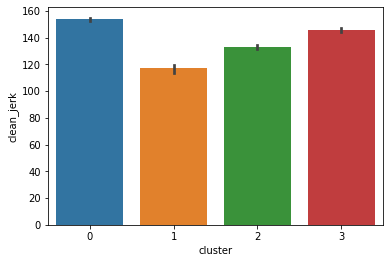

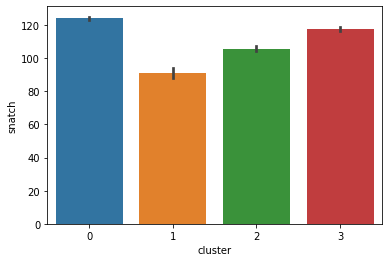

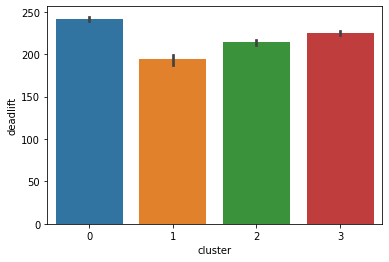

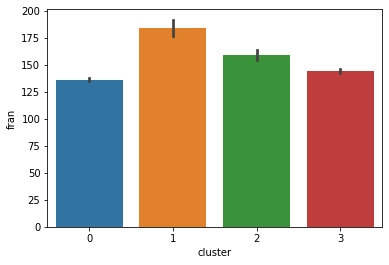

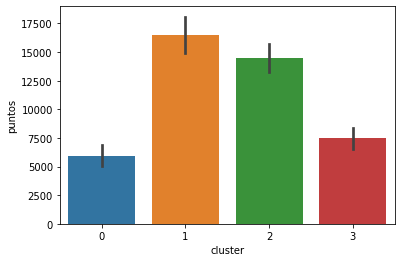

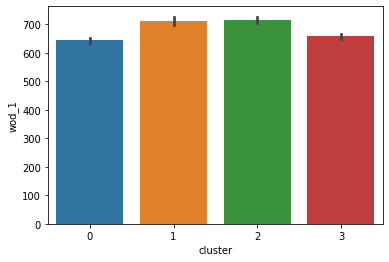

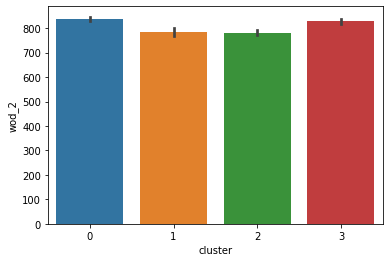

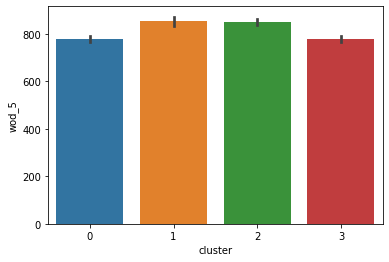

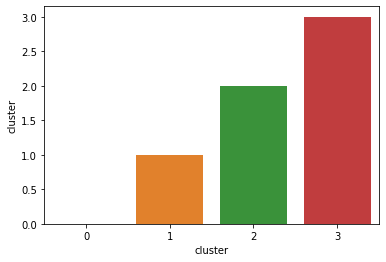

In [51]:
for i in columnas:
    sns.barplot(x = 'cluster',
               y = i,
               data = df.iloc[:,2:])
    plt.show()

<AxesSubplot:xlabel='cluster', ylabel='peso'>

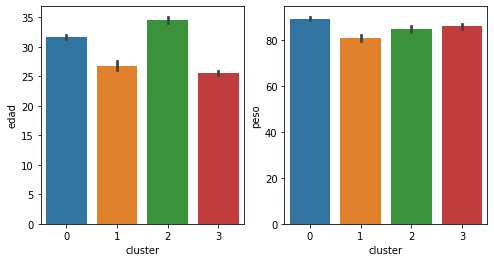

In [63]:
plt.figure(figsize = (8,4))
plt.subplot(1,2,1)
sns.barplot(x = 'cluster',
           y = 'edad',
           data = df)

plt.subplot(1,2,2)
sns.barplot(x = 'cluster',
           y = 'peso',
           data = df)

<AxesSubplot:xlabel='deadlift', ylabel='back_squat'>

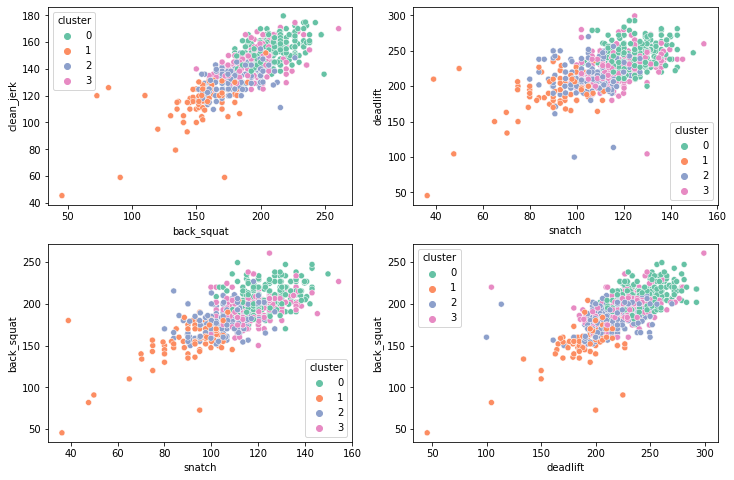

In [94]:
plt.figure(figsize = (12,8))

plt.subplot(2,2,1)
sns.scatterplot(x = 'back_squat',
               y = 'clean_jerk',
               hue = 'cluster',
               data = df,
               palette = 'Set2')

plt.subplot(2,2,2)
sns.scatterplot(x = 'snatch',
               y = 'deadlift',
               hue = 'cluster',
               data = df,
               palette = 'Set2')

plt.subplot(2,2,3)
sns.scatterplot(x = 'snatch',
               y = 'back_squat',
               hue = 'cluster',
               data = df,
               palette = 'Set2')

plt.subplot(2,2,4)
sns.scatterplot(x = 'deadlift',
               y = 'back_squat',
               hue = 'cluster',
               data = df,
               palette = 'Set2')

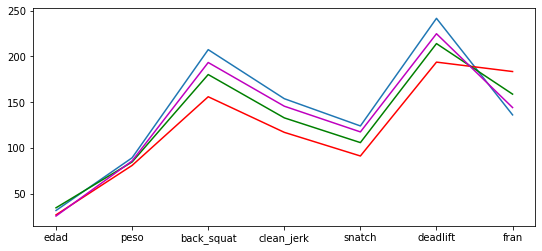

In [100]:
plt.figure(figsize = (9, 4))
plt.plot(df.loc[df['cluster'] == 0,: 'fran'].mean()) # Fuertes más pesados
plt.plot(df.loc[df['cluster'] == 1,: 'fran'].mean(), color = 'r') #débiles menos pesados
plt.plot(df.loc[df['cluster'] == 2,: 'fran'].mean(), color = 'g') # Medios más viejos
plt.plot(df.loc[df['cluster'] == 3,: 'fran'].mean(), color = 'm') # jóvenes segundos más fuertes

<AxesSubplot:xlabel='cluster', ylabel='puntos'>

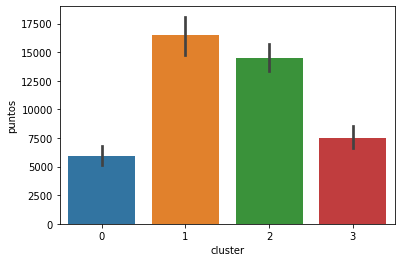

In [105]:
sns.barplot(x = 'cluster',
            y = 'puntos',
             data = df)